In [1]:
pip install pycaret

In [3]:
pip install interpret

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as ps
import seaborn as sns
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.blackbox import LimeTabular, ShapKernel, MorrisSensitivity, PartialDependence
import lime
import lime.lime_tabular
from interpret.perf import ROC
# Charger le jeu de données
import pandas as pd
from pycaret.datasets import get_data
from pycaret.classification import *


In [6]:
df=pd.read_csv('healthcare-dataset-stroke-data (1).csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.bmi=df.bmi.fillna(df.bmi.mean())

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#plot graph for individual columns

<AxesSubplot: xlabel='gender', ylabel='count'>

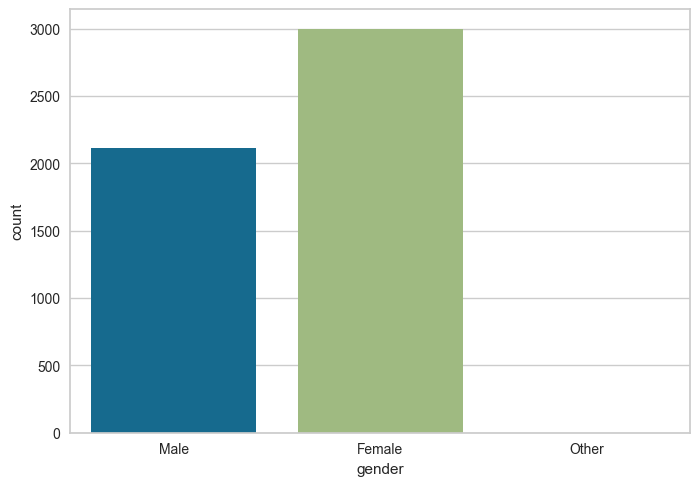

In [13]:
sns.countplot(x=df['gender'])

<AxesSubplot: xlabel='ever_married', ylabel='count'>

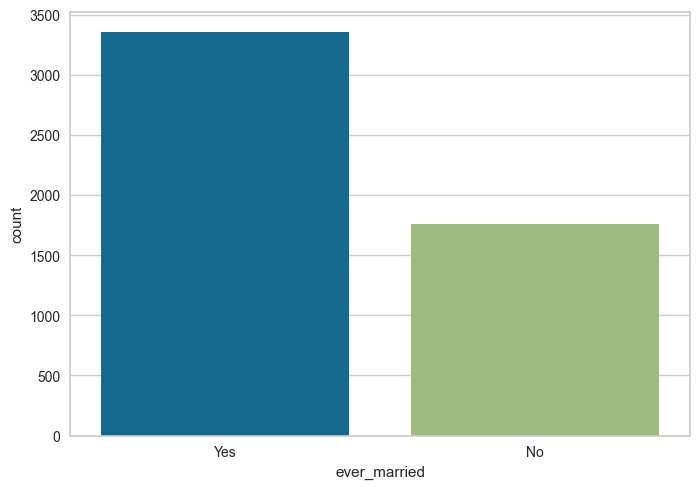

In [14]:
sns.countplot(x=df['ever_married'])

<AxesSubplot: xlabel='work_type', ylabel='count'>

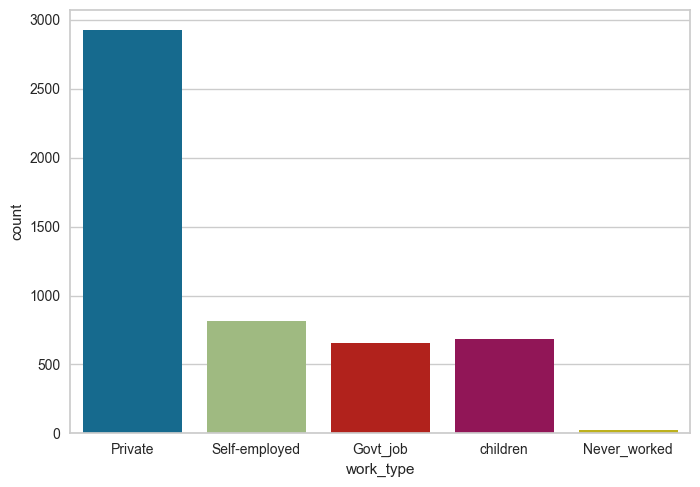

In [15]:
sns.countplot(x=df['work_type'])

<AxesSubplot: xlabel='Residence_type', ylabel='count'>

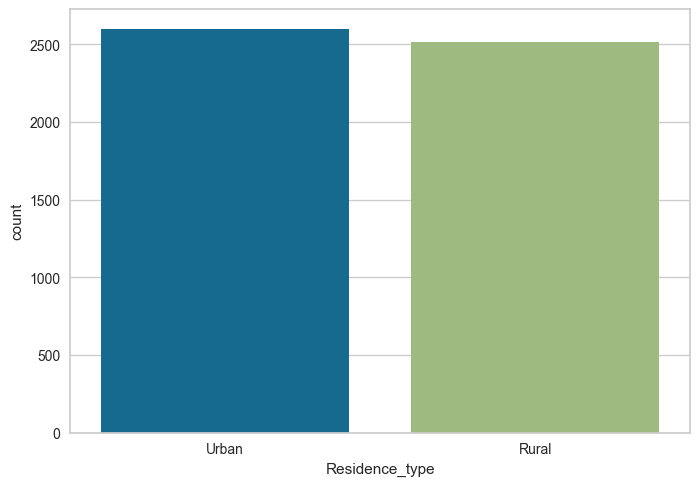

In [16]:
sns.countplot(x=df['Residence_type'])

<AxesSubplot: xlabel='smoking_status', ylabel='count'>

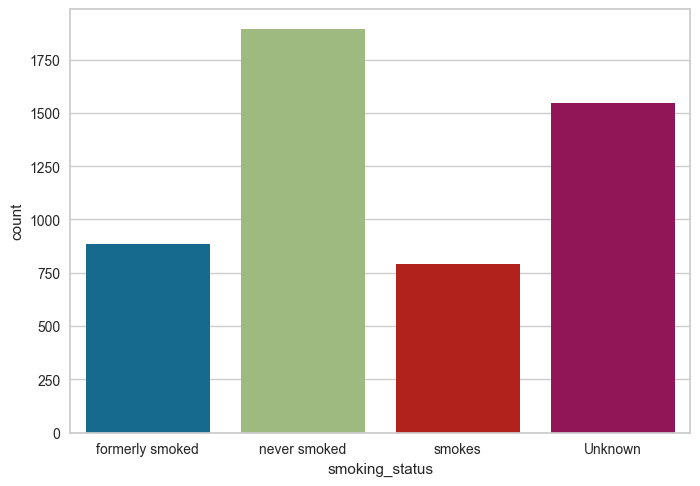

In [17]:
sns.countplot(x=df['smoking_status'])

In [18]:
df['smoking_status'].replace(to_replace='Unknown', value=df['bmi'].mode()[0], inplace=True)

<AxesSubplot: xlabel='smoking_status', ylabel='count'>

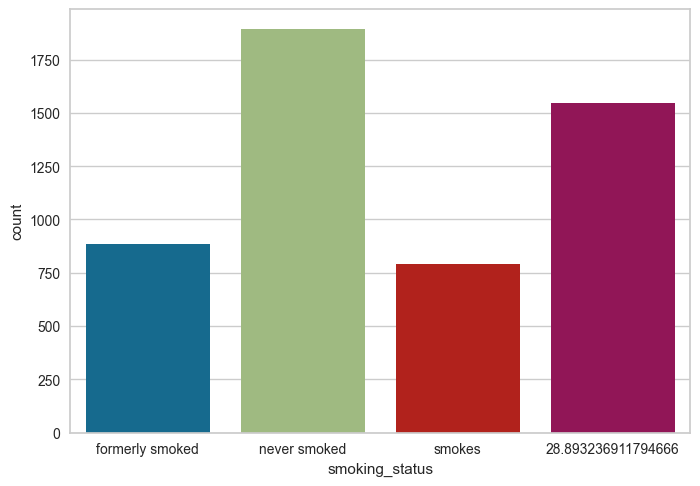

In [19]:
sns.countplot(x=df['smoking_status'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [22]:
a=pd.get_dummies(df.gender)
b=pd.get_dummies(df.ever_married)
c=pd.get_dummies(df.work_type)
d=pd.get_dummies(df.Residence_type)
e=pd.get_dummies(df.smoking_status)

In [23]:
merged=pd.concat([df, a, b, c, d, e,], axis='columns')
merged.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Never_worked,Private,Self-employed,children,Rural,Urban,28.893236911794666,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


In [24]:
data=merged.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Male', 'Yes', 'Private', 'Urban', 'formerly smoked'], axis='columns')
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Other,No,Govt_job,Never_worked,Self-employed,children,Rural,28.893236911794666,never smoked,smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,0,0,0,0,0,0,0,0,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,1,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,0,0,0,0,0,0,1,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,0,0,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,1,0,1,0,1,0


In [33]:
data.drop(['id'],inplace=True,axis=1)

In [25]:
dff=data.apply(le.fit_transform)

In [26]:
dff.drop(28.893236911794666, axis=1, inplace=True)






In [27]:
x=dff.drop('stroke', axis='columns')
y=dff.stroke

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

# prediction avec pycaret

In [32]:
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.blackbox import LimeTabular, ShapKernel, MorrisSensitivity, PartialDependence
import lime
import lime.lime_tabular
from interpret.perf import ROC
# Charger le jeu de données
import pandas as pd
from pycaret.datasets import get_data

from pycaret.regression import *


# Initialiser l'environnement PyCaret
clf1 = setup(data=dff, target='stroke')

# Créer et comparer plusieurs modèles
models_to_compare = ['lr', 'dt', 'rf', 'ada', 'knn']

# Sélectionner les meilleurs modèles en fonction de la métrique MAE
best_model = compare_models(include=models_to_compare, sort='MAE')

# Afficher le modèle sélectionné
print(best_model)

# Évaluer le modèle sur l'ensemble de test
evaluate_model(best_model)


,Description,Value
0,Session id,7655
1,Target,stroke
2,Target type,Regression
3,Original data shape,"(5110, 17)"
4,Transformed data shape,"(5110, 17)"
5,Transformed train set shape,"(3577, 17)"
6,Transformed test set shape,"(1533, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0836,0.0836,0.2882,-0.9078,0.1998,0.8207,0.0140
rf,Random Forest Regressor,0.0890,0.0446,0.2104,-0.0057,0.1511,0.8475,0.4240
lr,Linear Regression,0.0916,0.0418,0.2036,0.0584,0.1427,0.8856,0.0140
ada,AdaBoost Regressor,0.1399,0.0596,0.2414,-0.3346,0.1837,0.7619,0.0340


DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=7655, splitter='best')


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [34]:

# Create and compare multiple models
models_to_compare = ['lr', 'dt', 'rf', 'ada', 'knn']

for model_name in models_to_compare:
    # Creating a model
    current_model = create_model(model_name)
    
    # Train the model
    current_model.fit(X_train, y_train)

    # Create a blackbox model using the trained model
    blackbox_model = current_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0813,0.0317,0.1780,0.0222,0.1263,0.8887
1,0.0957,0.0466,0.2158,0.0730,0.1503,0.8849
2,0.0913,0.0413,0.2032,0.1350,0.1405,0.8555
3,0.0814,0.0338,0.1838,0.0348,0.1303,0.8998
4,0.1025,0.0484,0.2200,0.0824,0.1535,0.8736
5,0.0861,0.0360,0.1898,0.0413,0.1345,0.8911
6,0.0958,0.0455,0.2134,0.0465,0.1496,0.8898
7,0.0817,0.0346,0.1860,0.0136,0.1325,0.9021
8,0.0935,0.0410,0.2024,0.0432,0.1433,0.8844


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0670,0.0670,0.2589,-1.0694,0.1795,0.9167
1,0.0950,0.0950,0.3082,-0.8898,0.2136,0.8421
2,0.1006,0.1006,0.3171,-1.1059,0.2198,0.9444
3,0.0838,0.0838,0.2895,-1.3946,0.2007,0.9231
4,0.0978,0.0978,0.3127,-0.8536,0.2168,0.8000
5,0.0698,0.0698,0.2643,-0.8584,0.1832,0.8571
6,0.0754,0.0754,0.2746,-0.5794,0.1904,0.6667
7,0.0644,0.0644,0.2538,-0.8361,0.1760,0.7692
8,0.0868,0.0868,0.2947,-1.0284,0.2043,0.6875


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0772,0.0352,0.1876,-0.0861,0.1371,0.8642
1,0.0952,0.0498,0.2232,0.0083,0.1593,0.8584
2,0.0903,0.0455,0.2133,0.0469,0.1517,0.8394
3,0.0758,0.0380,0.1951,-0.0873,0.1410,0.8723
4,0.1069,0.0531,0.2304,-0.0068,0.1658,0.8290
5,0.0771,0.0380,0.1948,-0.0100,0.1394,0.8786
6,0.1001,0.0473,0.2175,0.0092,0.1581,0.8033
7,0.0719,0.0337,0.1835,0.0407,0.1324,0.8254
8,0.0896,0.0434,0.2083,-0.0139,0.1506,0.8444


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0684,0.0345,0.1857,-0.0640,0.1329,0.9115
1,0.1947,0.0796,0.2822,-0.5844,0.2226,0.6439
2,0.1855,0.0692,0.2630,-0.4484,0.2085,0.6391
3,0.0715,0.0399,0.1998,-0.1403,0.1412,0.8975
4,0.1802,0.0715,0.2675,-0.3564,0.2084,0.6870
5,0.1971,0.0754,0.2746,-1.0063,0.2213,0.6417
6,0.0977,0.0507,0.2251,-0.0609,0.1632,0.8386
7,0.0691,0.0359,0.1894,-0.0222,0.1343,0.9311
8,0.1736,0.0661,0.2571,-0.5435,0.2028,0.6913


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
1,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
2,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
5,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
6,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
7,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
8,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000


In [93]:
dff.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Other,No,Govt_job,Never_worked,Self-employed,children,Rural,never smoked,smokes
0,671,88,0,1,3850,240,1,0,0,0,0,0,0,0,0,0,0
1,3610,82,0,0,3588,162,1,1,0,0,0,0,1,0,1,1,0
2,2151,101,0,1,2483,199,1,0,0,0,0,0,0,0,1,1,0
3,4226,70,0,0,3385,218,1,1,0,0,0,0,0,0,0,0,1
4,114,100,1,0,3394,113,1,1,0,0,0,0,1,0,1,1,0


In [137]:
y_train.value_counts()

0    3901
1     187
Name: stroke, dtype: int64

In [135]:
dff['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [39]:
y_test.value_counts(

0    971
1     51
Name: stroke, dtype: int64

# Application de l'ia explicable

# Local Explanations: How an individual prediction was made

In [37]:
 # Explainability using LIME
for model_name in models_to_compare:
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    lime = LimeTabular(blackbox_model, X_train, random_state=1)
    lime_local = lime.explain_local(X_test[:5], y_test[:5], name=f'LIME_{model_name}')
    show(lime_local, 0)

<!-- http://127.0.0.1:7001/2481147070544/ -->

<!-- http://127.0.0.1:7001/2481185622032/ -->

<!-- http://127.0.0.1:7001/2481184808400/ -->

<!-- http://127.0.0.1:7001/2481185624336/ -->

<!-- http://127.0.0.1:7001/2481186306832/ -->

In [38]:
 # SHAP explanation
for model_name in models_to_compare:
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    background_val = pd.DataFrame(np.median(X_train, axis=0).reshape(1, -1), columns=x.columns)
    shap = ShapKernel(blackbox_model, background_val)
    shap_local = shap.explain_local(X_test[:5], y_test[:5], name=f'SHAP_{model_name}')
    show(shap_local, 0)


  0%|          | 0/5 [00:00<?, ?it/s]

<!-- http://127.0.0.1:7001/2481536033872/ -->

  0%|          | 0/5 [00:00<?, ?it/s]

<!-- http://127.0.0.1:7001/2481186907920/ -->

  0%|          | 0/5 [00:00<?, ?it/s]

<!-- http://127.0.0.1:7001/2481185783376/ -->

  0%|          | 0/5 [00:00<?, ?it/s]

<!-- http://127.0.0.1:7001/2481185770192/ -->

  0%|          | 0/5 [00:00<?, ?it/s]

<!-- http://127.0.0.1:7001/2481536637712/ -->

# Global Explanations: How the model behaves overall

In [100]:
for model_name in models_to_compare:
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    # Morris Sensitivity
    sensitivity = MorrisSensitivity(blackbox_model, X_train)
    sensitivity_global = sensitivity.explain_global(name=f'Morris_{model_name}')
    show(sensitivity_global)

<!-- http://127.0.0.1:7001/2068223952400/ -->

<!-- http://127.0.0.1:7001/2068225587088/ -->

<!-- http://127.0.0.1:7001/2068225829712/ -->

<!-- http://127.0.0.1:7001/2068223773712/ -->

<!-- http://127.0.0.1:7001/2068225758736/ -->

In [101]:
for model_name in models_to_compare: 
    # Train the model
    current_model.fit(X_train, y_train)

    # Create a blackbox model using the trained model
    blackbox_model = current_model
     # Marginal explanation
    marginal = Marginal().explain_data(X_train, y_train, name=f'Marginal_{model_name}')
    show(marginal)

<!-- http://127.0.0.1:7001/2068227096400/ -->

<!-- http://127.0.0.1:7001/2068224158288/ -->

<!-- http://127.0.0.1:7001/2068226988560/ -->

<!-- http://127.0.0.1:7001/2068226150096/ -->

<!-- http://127.0.0.1:7001/2068225803152/ -->

In [102]:
for model_name in models_to_compare: 
    # Train the model
    current_model.fit(X_train, y_train)
    # Create a blackbox model using the trained model
    blackbox_model = current_model
    # Partial Dependence
    pdp = PartialDependence(blackbox_model, X_train)
    pdp_global = pdp.explain_global(name=f'PDP_{model_name}')
    show(pdp_global, 0)


<!-- http://127.0.0.1:7001/2068226162128/ -->

<!-- http://127.0.0.1:7001/2068223798992/ -->

<!-- http://127.0.0.1:7001/2068223732624/ -->

<!-- http://127.0.0.1:7001/2068233977296/ -->

<!-- http://127.0.0.1:7001/2068260144720/ -->

In [106]:
from interpret import show
from interpret.perf import RegressionPerf
from sklearn.linear_model import LinearRegression
for model_name in models_to_compare:
   
    if model_name == 'lr':
        # Linear Regression
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        # Performance Explanation
        lr_perf = RegressionPerf(lr).explain_perf(X_test, y_test, name='Linear Regression')
        show(lr_perf)

      

<!-- http://127.0.0.1:7001/2069616671632/ -->

In [108]:
from sklearn.tree import DecisionTreeRegressor

for model_name in models_to_compare:

    if model_name == 'dt':
        # Decision Tree
        dt = DecisionTreeRegressor(random_state=seed)
        dt.fit(X_train, y_train)

        # Performance Explanation
        dt_perf = RegressionPerf(dt).explain_perf(X_test, y_test, name='Decision Tree')
        show(dt_perf)

        

<!-- http://127.0.0.1:7001/2068267794832/ -->